In [1]:
# Adapted from https://www.kaggle.com/code/awsaf49/detect-fake-text-kerasnlp-tf-torch-jax-train
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = mpl.cm.get_cmap("coolwarm")

In [2]:
class CFG:
#     verbose = 0  # Verbosity
    
#     wandb = True  # Weights & Biases logging
#     competition = 'llm-detect-ai-generated-text'  # Competition name
#     _wandb_kernel = 'awsaf49'  # WandB kernel
#     comment = 'DebertaV3-MaxSeq_200-ext_s-torch'  # Comment description
    
#     preset = "deberta_v3_base_en"  # Name of pretrained models
    sequence_length = 200  # Input sequence length
    
    device = 'TPU'  # Device
    
    seed = 42  # Random seed
    
#     num_folds = 5  # Total folds
#     selected_folds = [0, 1, 2]  # Folds to train on
    
#     epochs = 3 # Training epochs
#     batch_size = 3  # Batch size
#     drop_remainder = True  # Drop incomplete batches
#     cache = True # Caches data after one iteration, use only with `TPU` to avoid OOM
    
#     scheduler = 'cosine'  # Learning rate scheduler
    
    class_names = ["real", "fake"]  # Class names [A, B, C, D, E]
    num_classes = len(class_names)  # Number of classes
    class_labels = list(range(num_classes))  # Class labels [0, 1, 2, 3, 4]
    label2name = dict(zip(class_labels, class_names))  # Label to class name mapping
    name2label = {v: k for k, v in label2name.items()}  # Class name to label mapping

In [3]:
BASE_PATH = "/media/cybertron/fa54fcb6-b5e1-492e-978a-6389519c168a/llm_detect/dataset"

df = pd.read_csv(f"{BASE_PATH}/train_essays.csv")
df['label'] = df.generated.copy()
df['name'] = df.generated.map(CFG.label2name)

# Train Data: 1,378


,id,prompt_id,text,generated,label,name
0,0059830c,0,Cars. Cars have been around since they became ...,0,0,real
1,005db917,0,Transportation is a large necessity in most co...,0,0,real


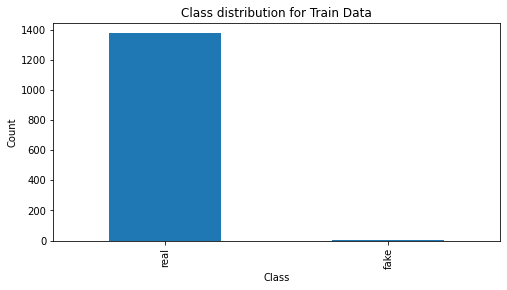

In [6]:
print("# Train Data: {:,}".format(len(df)))
display(df.head(2))
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
#df.name.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25), cmap(0.65), cmap(0.9), cmap(1.0)])
df.name.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

<AxesSubplot:>

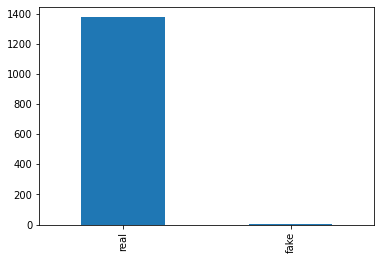

## external data

,essay_id,text,label,source,prompt,fold
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN,8
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...,0


44206
# Train Data: 44,206


,essay_id,text,label,source,prompt,fold,name
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1,fake
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2,real


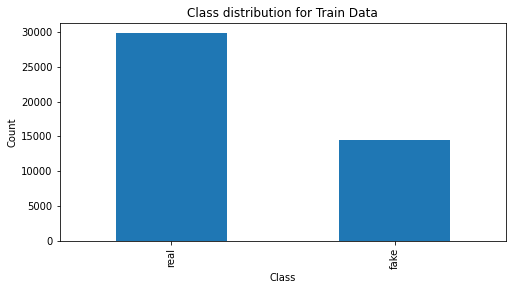

In [14]:
EX1 = '/media/cybertron/fa54fcb6-b5e1-492e-978a-6389519c168a/llm_detect/external_dataset/proper_dataset'

ef = pd.read_csv(f"{EX1}/train_drcat_04.csv")
display(ef.head())

ef['name'] = ef.label.map(CFG.label2name)

print(len(ef))

print("# Train Data: {:,}".format(len(ef)))
display(ef.head(2))
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
#df.name.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25), cmap(0.65), cmap(0.9), cmap(1.0)])
ef.name.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()